In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import pdb

In [2]:
selector = ['UCB', 'SGV_UCB', 'MUTUAL_INFO']
selector = ['SGV_UCB']
selectors = selector
directory = 'results/'
model = 'linear'
user = 'perfect'
fake_func = 'linear'
hyper = 'no'

	results/AT_SGV_UCB_model_linear_user_perfect_fake_linear_no_env*/train_data.npz
(0, 21)
standard diffs shape: (0, 21)
(21,)


/home/ian/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ian/.local/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/ian/.local/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ian/.local/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/ian/.local/lib/python3.10/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


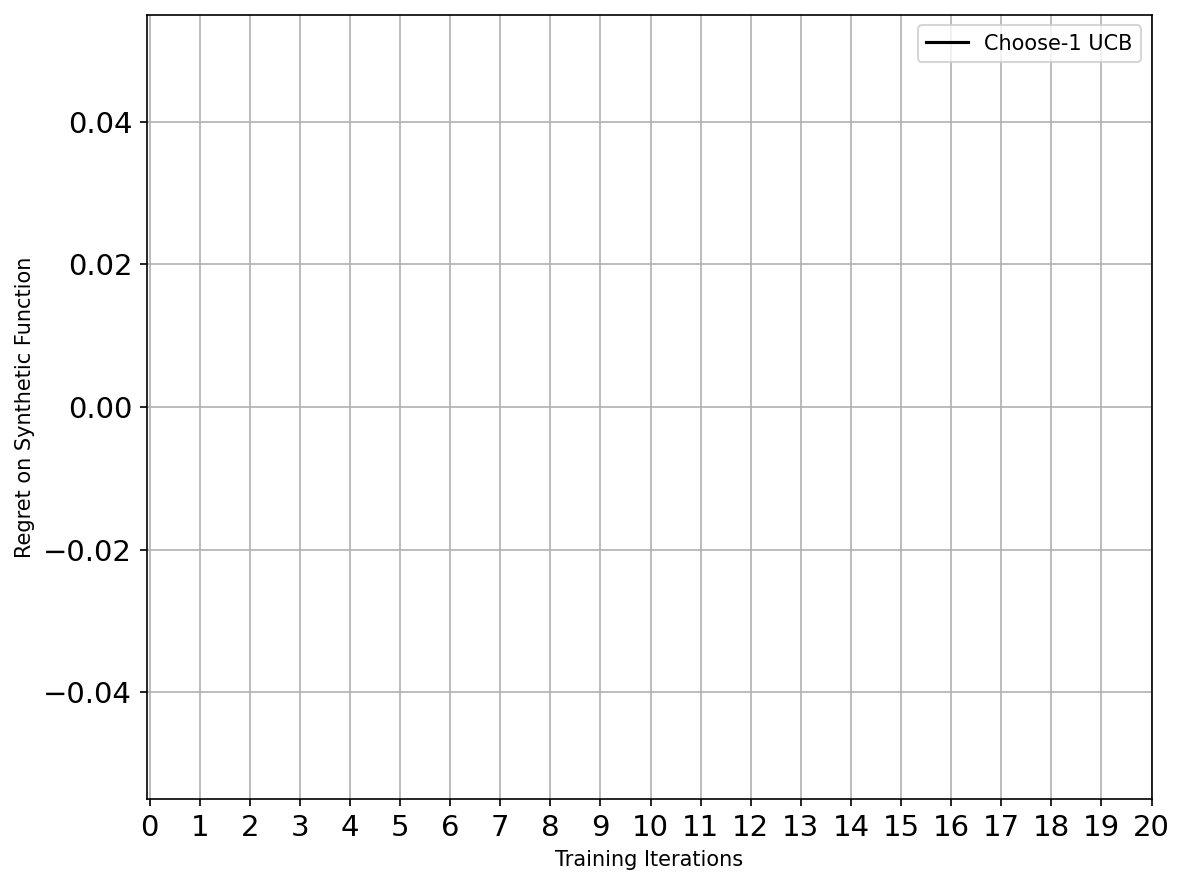

In [3]:
plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []


for i, selector in enumerate(selectors):
    glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
    #glob_check = directory+'AT_'+selector+'_env*/train_data.npz'
    print('\t'+glob_check)
    files = glob(glob_check)
    
#     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
#     files = glob(glob_check)
    
    
    score_diffs = np.empty((0,21))
    for file in files:
        data_file = np.load(file)
        #print(file)
        #print(list(data_file.keys()))
        score_diff = np.mean(data_file['score_diff'], axis=(2,))
        #score_diff = data_file['avg_correct']
        #pdb.set_trace()
        #print(file)
        #print(data_file['score_diff'].shape)
        #print(data_file['score_diff'])
        score_diffs = np.append(score_diffs, score_diff, axis=0)
        
    print(score_diffs.shape)
    all_score_diffs.append(score_diffs)
    
    itr_to_show = 21
    
    mean_diffs = np.mean(score_diffs, axis=0)
    std_diffs = np.std(score_diffs, axis=0)
    print('standard diffs shape: '+ str(score_diffs.shape))
    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
    print(mean_diffs.shape)
    
    x = np.arange(1,itr_to_show)
    
    sigma_to_plot = 1.0
    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
    plt.gca().fill_between(x, \
                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                            color=colors[i], \
                            alpha=0.1, \
                            label='_nolegend_')
    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[i])

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Choose-1 Mutual Info']
plt.legend(leg_txt)

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')

plt.xticks(range(0,21))
plt.grid(True)

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

In [4]:
print(all_score_diffs[0].shape)

(0, 21)


	results/AT_RANDOM_model_linear_user_perfect_fake_linear_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_linear_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_logistic_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_logistic_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_squared_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_squared_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_sin_exp_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_sin_exp_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_min_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_min_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_max_no_env*/train_data.npz
	results/AT_RANDOM_model_gp_user_perfect_fake_max_no_env*/train_data.npz
	results/AT_RANDOM_model_linear_user_perfect_fake_squared_min_max_no

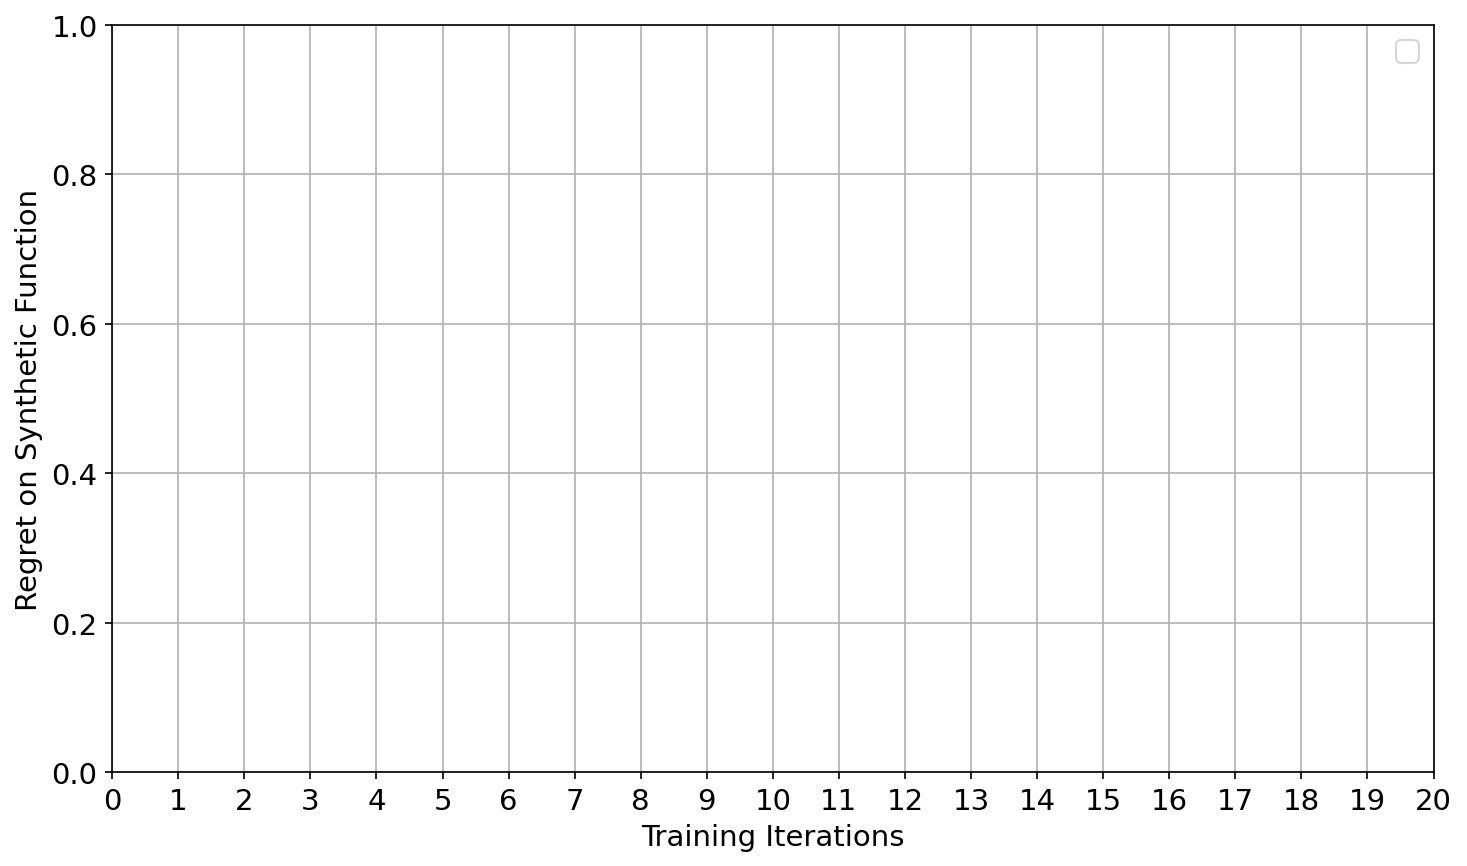

In [5]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_UCB']
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['MUTUAL_INFO']
selector = 'RANDOM'
user_types = ['perfect', 'human_choice']
user_types = ['perfect']
user = 'perfect'

models = ['linear', 'gp']
fake_funcs = ['linear', 'logistic', 'squared', 'sin_exp', 'min', 'max', 'squared_min_max']
hypers = ['no']

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, hyper in enumerate(hypers):
        for k, model in enumerate(models):
            glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
            print('\t'+glob_check)
            files = glob(glob_check)

            if len(files) > 0:
            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
            #     files = glob(glob_check)


                score_diffs = np.empty((0,21))
                for file in files:
                    data_file = np.load(file)
                    print(file)
                    #print(list(data_file.keys()))
                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                    #score_diff = data_file['avg_correct']
                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                print(score_diffs.shape)
                all_score_diffs.append(score_diffs)

                itr_to_show = 21

                mean_diffs = np.mean(score_diffs, axis=0)
                std_diffs = np.std(score_diffs, axis=0)
                print('standard diffs shape: '+ str(score_diffs.shape))
                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                print(mean_diffs.shape)

                x = np.arange(1,itr_to_show)

                sigma_to_plot = 1.0
                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                plt.gca().fill_between(x, \
                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        color=colors[j], \
                                        alpha=0.1, \
                                        label='_nolegend_')
                plt.plot(x, mean_diffs[1:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                leg = 'model: '+model+' hyp: ' + hyper+ ' '+fake_func
                leg_txt.append(leg)
                
                color_idx += 1
                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0)) 



plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()

plt.savefig('synthetic_training.png')

plt.show()

[]


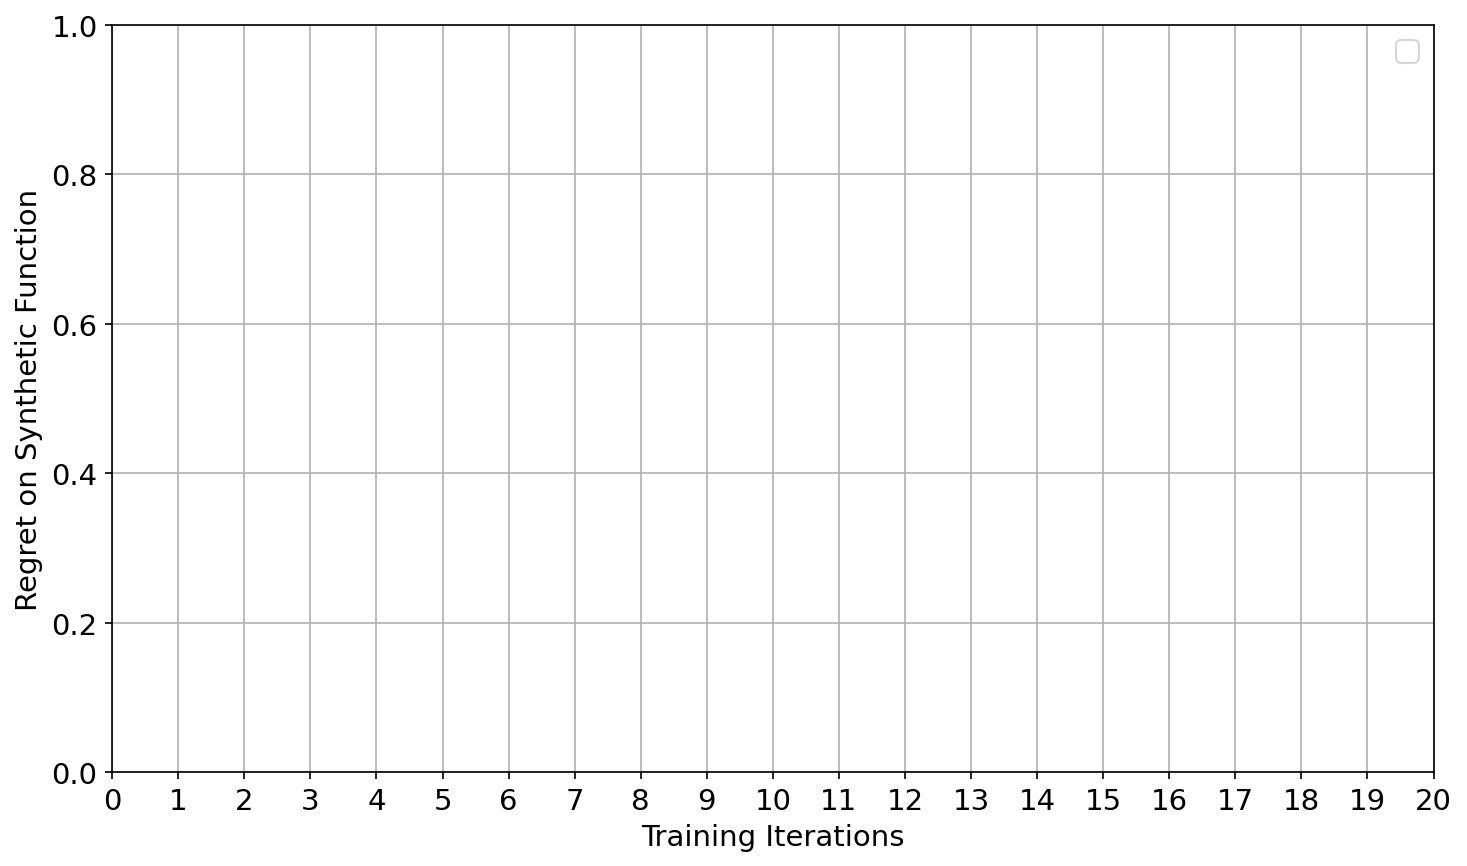

In [6]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp']
user = 'perfect'
fake_funcs = ['linear', 'logistic', 'squared', 'sin_exp', 'squared_min_max']
#fake_funcs = ['linear']
hypers = ['no']
hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for k, model in enumerate(models):
            glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
            #print('\t'+glob_check)
            files = glob(glob_check)

            if len(files) > 0:
            #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
            #     files = glob(glob_check)


                score_diffs = np.empty((0,21))
                for file in files:
                    data_file = np.load(file)
                    print(file)
                    #print(list(data_file.keys()))
                    score_diff = np.mean(data_file['score_diff'], axis=(2,))
                    #score_diff = data_file['avg_correct']
                    score_diffs = np.append(score_diffs, score_diff, axis=0)

                print(score_diffs.shape)
                all_score_diffs.append(score_diffs)

                itr_to_show = 21

                mean_diffs = np.mean(score_diffs, axis=0)
                std_diffs = np.std(score_diffs, axis=0)
                print('standard diffs shape: '+ str(score_diffs.shape))
                std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                print(mean_diffs.shape)

                x = np.arange(1,itr_to_show)

                sigma_to_plot = 1.0
                #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                plt.gca().fill_between(x, \
                                        mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                        color=colors[j], \
                                        alpha=0.1, \
                                        label='_nolegend_')
                plt.plot(x, mean_diffs[1:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                leg = selector +' '+fake_func
                leg_txt.append(leg)
                
                color_idx += 1
                line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

[]


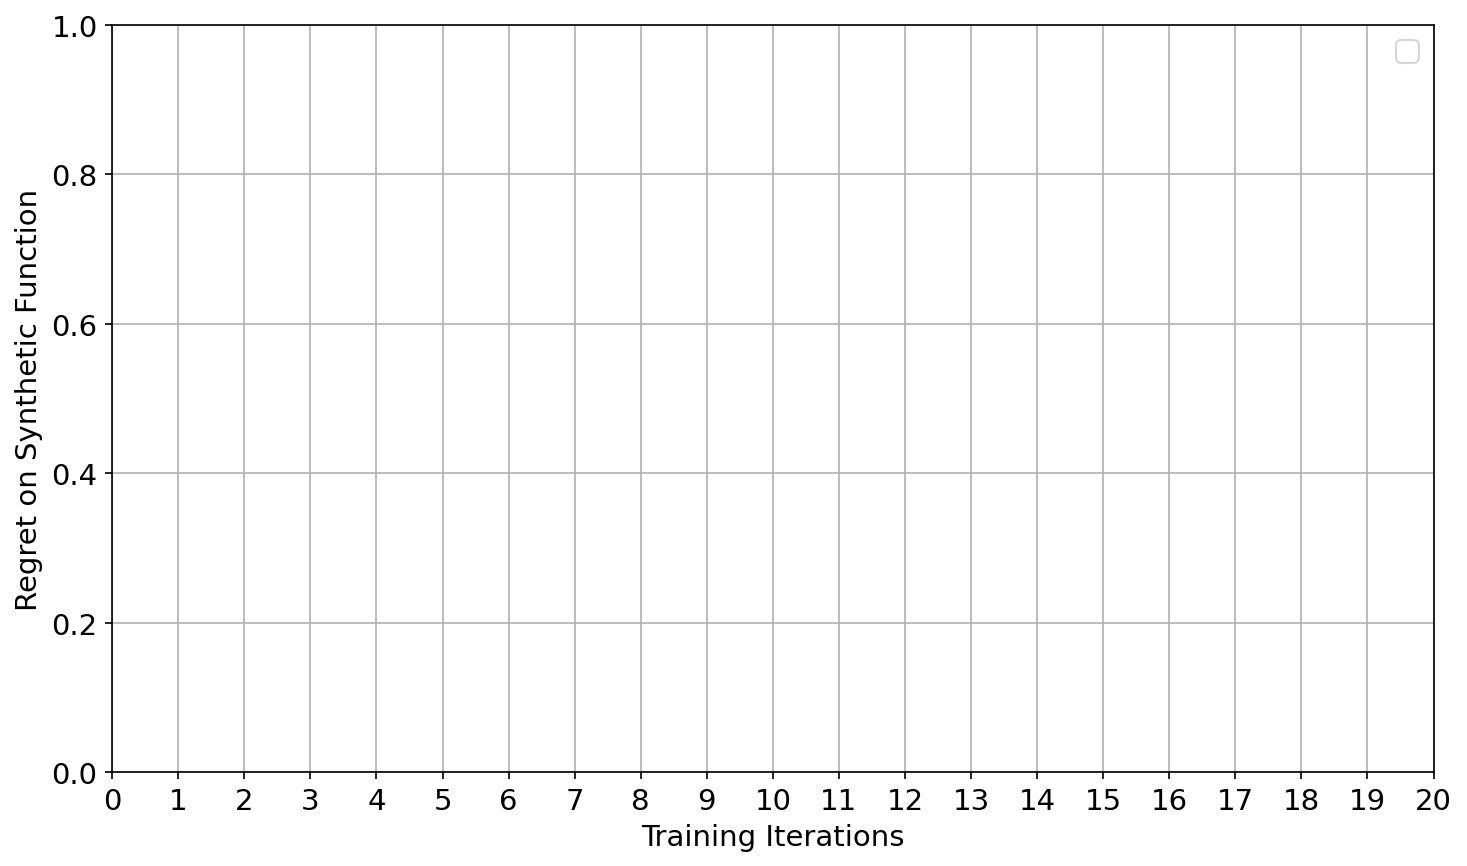

In [7]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['RANDOM']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['min', 'linear']#,'logistic', 'squared', 'sin_exp']
hypers = ['no', 'hyper']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(10,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[j], linestyle=linestyles[line_style_idx])

                    leg = model +' with '+hyper+' hyper '+fake_func
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

[]


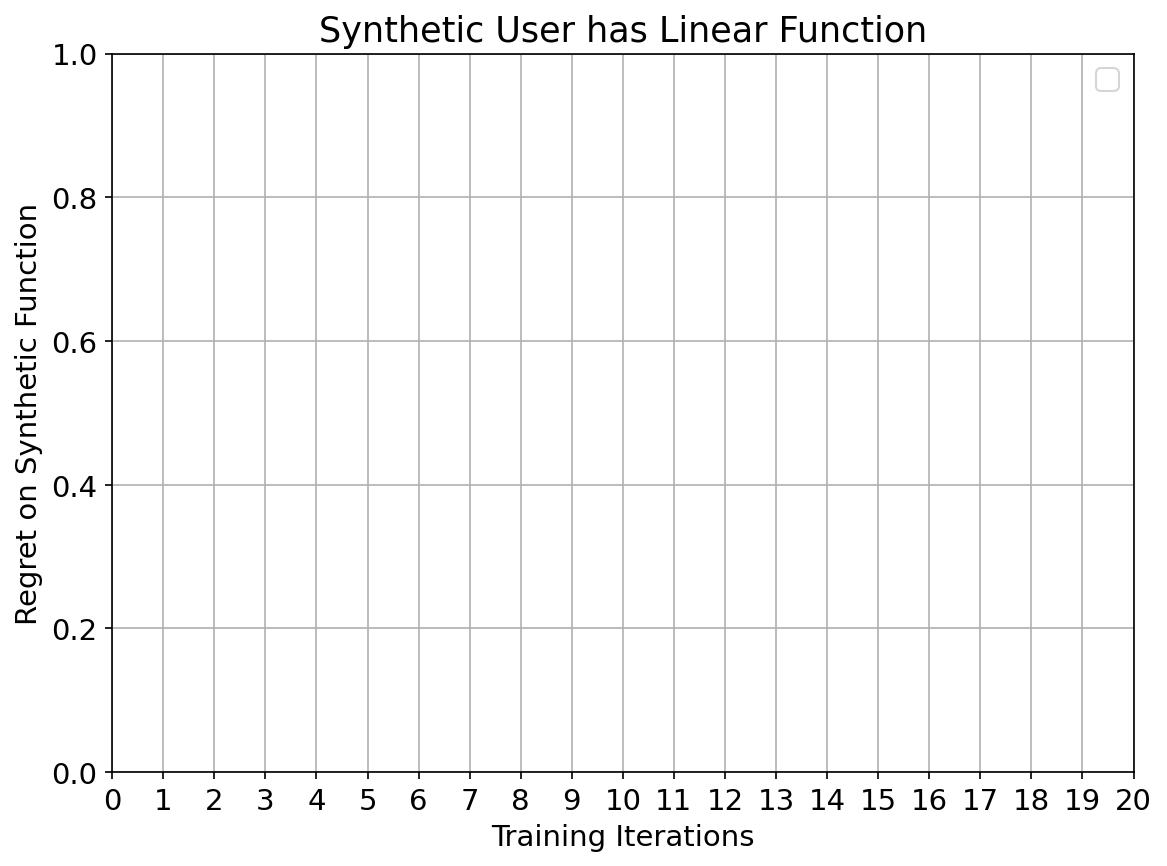

In [8]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['linear']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[5], linestyle=linestyles[line_style_idx])

                    model_text = ''
                    if model == 'gp':
                        model_text = 'Gaussian Process'
                    elif model == 'linear':
                        model_text = 'Linear'
                    leg = model_text + ' model'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Synthetic User has Linear Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env0_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env7_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env5_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env1_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env4_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env6_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env8_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env3_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env2_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env9_2024-07-24_14-40-44/train_data.npz
(500, 21)
standard diffs shape: (500, 21)
(21,)
['Gaussian Process mod

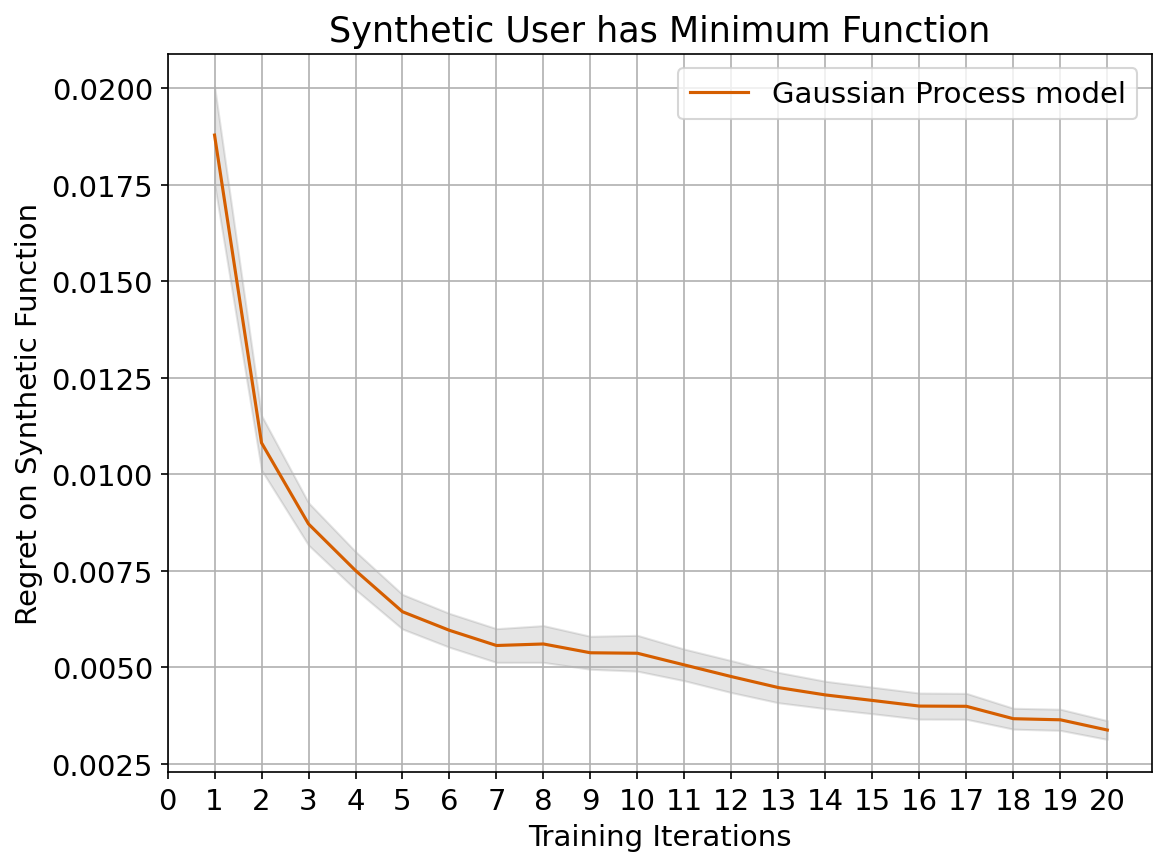

In [9]:
selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'UCB', 'RANDOM']
selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp', 'linear']
user = 'perfect'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                #print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[4], linestyle=linestyles[line_style_idx])

                    model_text = ''
                    if model == 'gp':
                        model_text = 'Gaussian Process'
                    elif model == 'linear':
                        model_text = 'Linear'
                    leg = model_text + ' model'# learning ' + fake_func + ' function'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('Synthetic User has Minimum Function')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()

	results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env*/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env0_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env7_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env5_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env1_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env4_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env6_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env8_2024-07-24_14-40-44/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env3_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env2_2024-07-24_14-40-45/train_data.npz
results/AT_SGV_UCB_model_gp_user_perfect_fake_min_no_env9_2024-07-24_14-40-44/train_data.

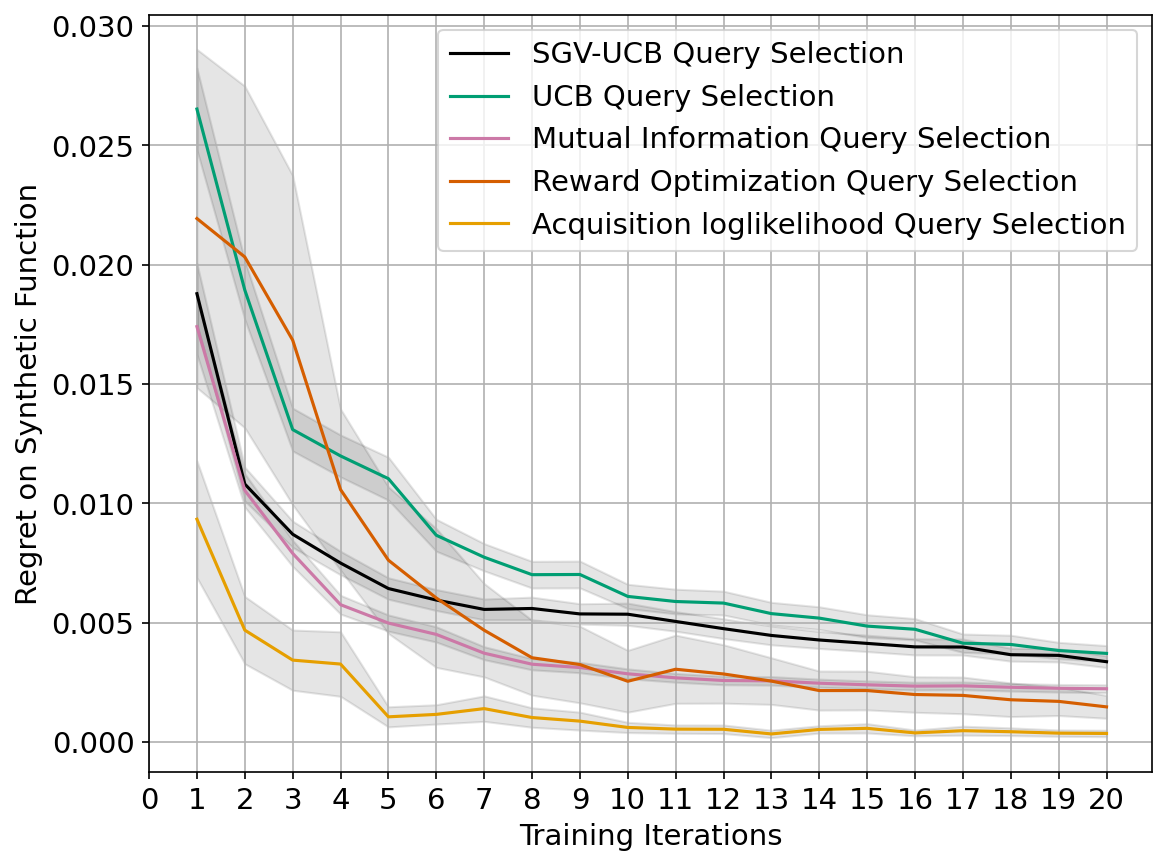

In [13]:
#selectors = ['SGV_UCB', 'MUTUAL_INFO', 'MUTUAL_INFO_PERF']
selectors = ['SGV_UCB', 'UCB', 'MUTUAL_INFO', 'RANDOM', 'BAYES_INFO_GAIN_PROBIT','BAYES_INFO_GAIN_999', 'ACQ_RHO', 'ACQ_LL', 'ACQ_EPIC', 'ACQ_SP', 'ACQ_SPEAR']
#selectors = ['SGV_UCB']
user_types = ['perfect', 'human_choice']
user_types = ['human_choice']

models = ['gp']
user = 'perfect'
fake_funcs = ['min']#,'logistic', 'squared', 'sin_exp']
hypers = ['no']
#hyper = hypers[0]

plot_data = []

plt.rc('font', size=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

median_color = '#E69F00'
colors = ['#000000', '#009E73', '#CC79A7', '#0072B2', '#D55E00', '#56B4E9', '#F0E442', '#E69F00']
colors = colors + colors + colors + colors
linestyles=['-','--',':','-.']
#56B4E9
plt.figure(figsize=(8,6), dpi=150)
#plt.figure(figsize=(8,6), dpi=50)

all_score_diffs = []

color_idx = 0
line_style_idx = 0

leg_txt = []

for j, fake_func in enumerate(fake_funcs):
    line_style_idx = 0
    for i, selector in enumerate(selectors):
        for l, hyper in enumerate(hypers):
            for k, model in enumerate(models):
                glob_check = directory+'AT_'+selector+'_model_'+model+'_user_'+user+'_fake_'+fake_func+'_'+hyper+'_env*/train_data.npz'
                print('\t'+glob_check)
                files = glob(glob_check)

                if len(files) > 0:
                #     glob_check = directory+'AT_'+selector+'_env7*/train_data.npz'
                #     files = glob(glob_check)


                    score_diffs = np.empty((0,21))
                    for file in files:
                        data_file = np.load(file)
                        print(file)
                        #print(list(data_file.keys()))
                        score_diff = np.mean(data_file['score_diff'], axis=(2,))
                        #score_diff = data_file['avg_correct']
                        score_diffs = np.append(score_diffs, score_diff, axis=0)

                    print(score_diffs.shape)
                    all_score_diffs.append(score_diffs)

                    itr_to_show = 21

                    mean_diffs = np.mean(score_diffs, axis=0)
                    std_diffs = np.std(score_diffs, axis=0)
                    print('standard diffs shape: '+ str(score_diffs.shape))
                    std_error_mean = std_diffs / np.sqrt(score_diffs.shape[0])
                    print(mean_diffs.shape)

                    x = np.arange(1,itr_to_show)

                    sigma_to_plot = 1.0
                    #plt.errorbar(x, mean_diffs[:itr_to_show], yerr=std_error_mean[:itr_to_show], capsize=5, color=colors[i])
                    plt.gca().fill_between(x, \
                                            mean_diffs[1:itr_to_show]-(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            mean_diffs[1:itr_to_show]+(sigma_to_plot*std_error_mean[1:itr_to_show]), \
                                            color=colors[j], \
                                            alpha=0.1, \
                                            label='_nolegend_')
                    plt.plot(x, mean_diffs[1:itr_to_show], color=colors[i], linestyle=linestyles[0])

                    selector_text = ''
                    if selector == 'SGV_UCB':
                        selector_text = 'SGV-UCB'
                    elif selector == 'UCB':
                        selector_text = 'UCB'
                    elif selector == 'MUTUAL_INFO':
                        selector_text = 'Mutual Information'
                    elif selector == 'RANDOM':
                        selector_text = 'Random'
                    elif selector == 'BAYES_INFO_GAIN_PROBIT':
                        selector_text = 'Reward Optimization'
                    elif selector == 'ACQ_RHO':
                        selector_text = 'Acquisition-rho'
                    elif selector == 'ACQ_LL':
                        selector_text = 'Acquisition loglikelihood'
                    elif selector == 'ACQ_EPIC':
                        selector_text = 'Acquisition EPICish'
                    elif selector == 'ACQ_SP':
                        selector_text = 'Acquisition Spearman old'
                    elif selector == 'ACQ_SPEAR':
                        selector_text = 'Acquisition Spearman'
                    leg = selector_text + ' Query Selection'
                    leg_txt.append(leg)

                    color_idx += 1
                    line_style_idx += 1

#leg_txt = ['Choose-1 UCB', 'Choose-1 GV-UCB', 'Rating', 'Ranking UCB', 'Ranking GV-UCB', 'Choose-1 Mutual Info', 'Choose-1 Random']
#leg_txt = ['Choose-1 GV-UCB perfect', 'Choose-1 GV-UCB human_choice']



        
print(leg_txt)
plt.legend(leg_txt, bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Training Iterations')
plt.ylabel('Regret on Synthetic Function')
plt.title('')
plt.xticks(range(0,21))

plt.grid()

plt.tight_layout()
plt.savefig('synthetic_training.png')

plt.show()